In [137]:
import numpy as np
import os

import cv2

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score

import numpy as np
import pandas as pd
import joblib

import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
from scipy.signal import hamming

import librosa
import os
import math
import numpy as np
import csv
from scipy.signal import find_peaks

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score

import cv2

def filtrare_liniste(path_fisiere, pathuri_fisiere_out_prag, praguri):
    for i in range(len(praguri)):
        for j in range(len(path_fisiere)):
            path_fisier = r'{}'.format(path_fisiere[j])
            y, sr = librosa.load(path_fisier, sr=8000, mono=True)

            clip = librosa.effects.trim(y, top_db=praguri[i])       #elimina semnalul cu o putere sub 10db, fiind considerat liniste

            path_fisier_out_prag = r'{}'.format(pathuri_fisiere_out_prag[i][j])
            
            sf.write(path_fisier_out_prag, clip[0], sr)          #se salveaza noul semnal audio
            

def spectograma(y, nr_onset, folder_out, sr=22050):
    if not folder_out in os.listdir(os.getcwd()):
        os.mkdir(folder_out)
    path = os.getcwd()
    path_folder_out = os.path.join(path, folder_out)                    # se afla in proiect
    fisier_out = 'onset' +str(nr_onset) + '.jpg'                       # splitext ia numele fisierului fara extensie
    path_fisier_out = os.path.join(path_folder_out, fisier_out)         # calea fisierului de out

    plt.interactive(False)
    fig = plt.figure(figsize=[0.72, 0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)

    S = librosa.feature.melspectrogram(y=y, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))

    fig.savefig(path_fisier_out, dpi=400, bbox_inches='tight', pad_inches=0)

    plt.close(fig)
    

def spectograme_onseturi(fisier_wav, folder_spectograme_semnal):
    y, sr = librosa.load(fisier_wav)
    print(sr)  #rata de esnationare
    print(len(y))  #y = duratata semnal in secunde * rata de esantionare sr
    #durata = len(y)/sr

    plt.figure(figsize=(14,5))
    librosa.display.waveshow(y, sr=sr)

    o_env = librosa.onset.onset_strength(y=y, sr=sr)
    times = librosa.times_like(o_env, sr=sr)
    onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

    print(onset_frames) # frame numbers of estimated onsets

    onset_times = librosa.frames_to_time(onset_frames)
    print(onset_times)

    y_db = 10.0 * np.log10(y)

    plt.figure(figsize=(10,5))
    librosa.display.waveshow(y, sr=sr)
    plt.vlines(onset_times, -0.3, 0.3, color = 'r')
    
    #Esantionare semnal
    fereastra = int(30*1e-3*sr)
    print(fereastra)

    #Ferestre suprapuse
    p=0.2  #Factorul de suprapunere

    #Numarul de cadre suprarpuse
    numar_cadre_p = int(len(y)/(fereastra*(1-p)))

    #Creare variabila timp pentru axa Ox
    time_axis = np.arange(0, fereastra)*1/sr #utilizata la plot-uri
    
    
    # cadre onset

    durata = len(y) / sr
    timpi = np.arange(0, durata, 1/sr)
    dictionar = {}
    nr_esantion = [i for i in range(1, len(y) + 1)]
    for i in range(len(nr_esantion)):
        dictionar[nr_esantion[i]] = timpi[i]

    cadre = []
    for i in range(len(onset_times)):
        onset1 = onset_times[i]
        try:
            onset2 = onset_times[i+1]
        except IndexError:
            onset2 = timpi[-1]
        cadru_curent = []
        for j in range(len(y)):
            if j in dictionar:
                if dictionar[j] > onset1: 
                    if dictionar[j] < onset2:
                        cadru_curent.append(j)
                    else:
                        break
        cadre.append(cadru_curent)

    # fiecare onset are o lista de esantioane
    esantioane_onset = []
    for i in range(len(cadre)):
        esantioane_onset.append(y[cadre[i][0] : cadre[i][-1]])
    
#     esantioane_onset_filtrate = []
#     for i in esantioane_onset:
#         i = librosa.effects.trim(i, top_db=11)[0]       #elimina semnalul cu o putere sub 11db, fiind considerat liniste
#         esantioane_onset_filtrate.append(i)
    
#     esantioane_onset = esantioane_onset_filtrate

    # note aferente fiecarui onset  
    note = []
    frecvente = []
    for i in range(len(esantioane_onset)):
        spectograma(esantioane_onset[i], i, folder_spectograme_semnal)

22050
312320
[  3  10  19  21  32  41  43  52  63  74  76  83  94 106 118 134 145 160
 170 180 192 201 213 224 235 244 255 266 277 293 302 319 328 339 345 351
 358 364 371 380 382 391 401 409 417 426 436 446 456 467 478 489 500 508
 520 531 558 574 576 595]
[ 0.06965986  0.23219955  0.44117914  0.48761905  0.74303855  0.95201814
  0.99845805  1.20743764  1.46285714  1.71827664  1.76471655  1.92725624
  2.18267574  2.46131519  2.73995465  3.11147392  3.36689342  3.71519274
  3.94739229  4.17959184  4.45823129  4.66721088  4.94585034  5.20126984
  5.45668934  5.66566893  5.92108844  6.17650794  6.43192744  6.80344671
  7.0124263   7.40716553  7.61614512  7.87156463  8.01088435  8.15020408
  8.31274376  8.45206349  8.61460317  8.82358277  8.87002268  9.07900227
  9.31120181  9.49696145  9.68272109  9.89170068 10.12390023 10.35609977
 10.58829932 10.84371882 11.09913832 11.35455782 11.60997732 11.79573696
 12.07437642 12.32979592 12.95673469 13.32825397 13.37469388 13.81587302]
661


C:\Users\bogdan1.bratu\AppData\Local\Temp\ipykernel_28520\1124824979.py:87: RuntimeWarning: divide by zero encountered in log10
  y_db = 10.0 * np.log10(y)
C:\Users\bogdan1.bratu\AppData\Local\Temp\ipykernel_28520\1124824979.py:87: RuntimeWarning: invalid value encountered in log10
  y_db = 10.0 * np.log10(y)
C:\Users\bogdan1.bratu\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1022
  return f(*args, **kwargs)
C:\Users\bogdan1.bratu\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1023
  return f(*args, **kwargs)


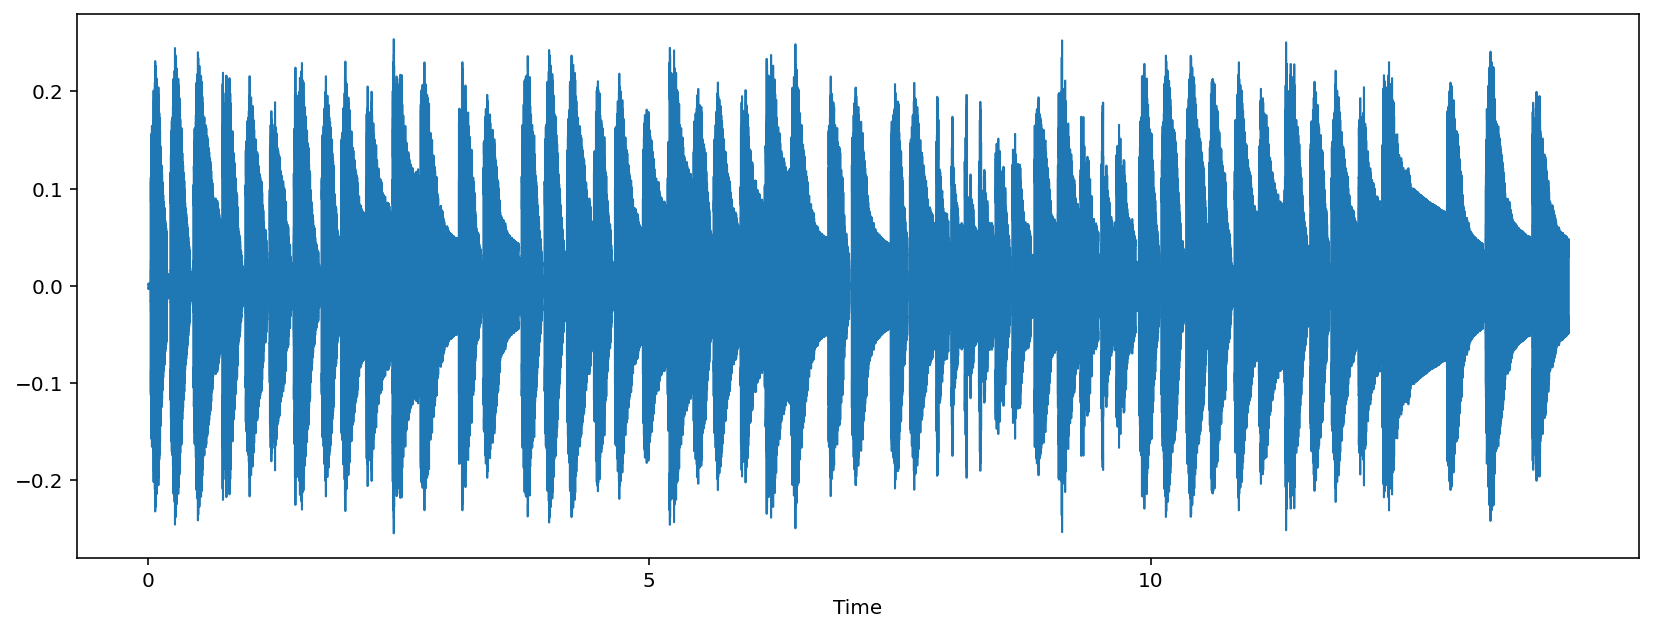

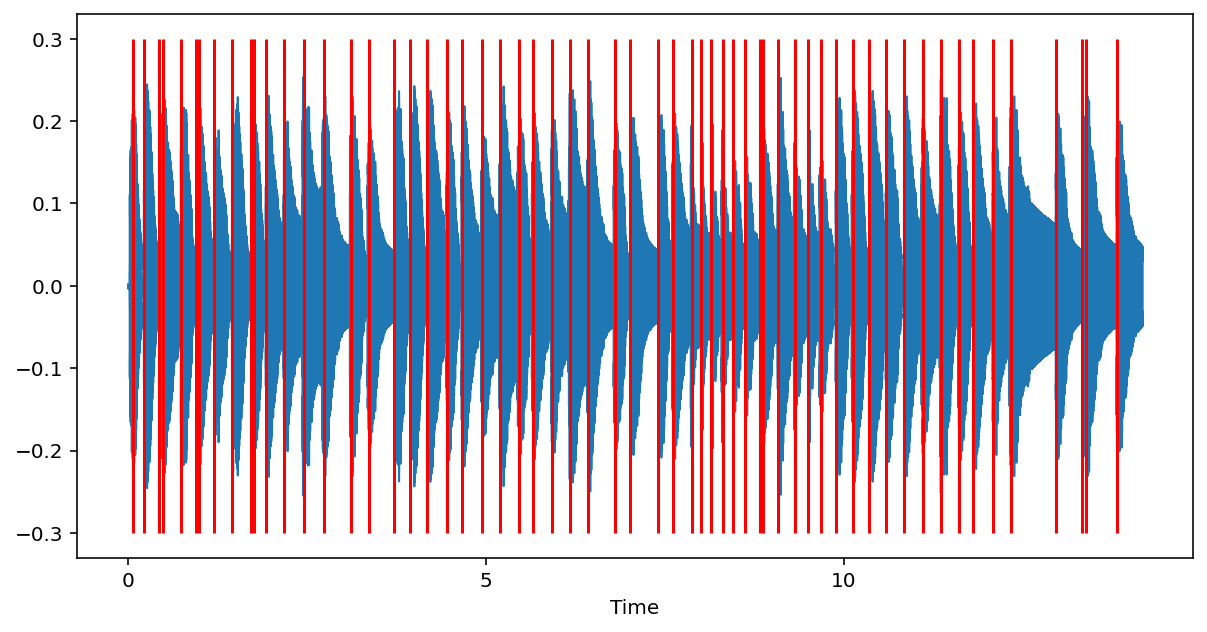

In [138]:
fisier_wav = 'wis3.wav'
folder_spectograme_semnal = 'wis3_spectograme'
folder_spectograme = 'spectograme_trainsitest_filtrate_prag11db'
# 
spectograme_onseturi(fisier_wav, folder_spectograme_semnal)         # folder cu spectograme rezultat
# 

In [139]:
# spectograme individual
path_folder = os.path.join(os.getcwd(), folder_spectograme)
fisiere = os.listdir(path_folder)
path_fisiere = [os.path.join(path_folder, i) for i in fisiere]

imagini = [cv2.imread(i) for i in path_fisiere]
imagini = np.array(imagini)
dim = len(imagini[0]) * len(imagini[0][0]) * 3
imagini = imagini.reshape((imagini.shape[0]), dim)

# spectograme semnal
path_folder_semnal = os.path.join(os.getcwd(), folder_spectograme_semnal)
fisiere_semnal = os.listdir(path_folder_semnal)
path_fisiere_semnal = [os.path.join(path_folder_semnal, i) for i in fisiere_semnal]

imagini_semnal = [cv2.imread(i) for i in path_fisiere_semnal]
imagini_semnal = np.array(imagini_semnal)
dim_semnal = len(imagini_semnal[0]) * len(imagini_semnal[0][0]) * 3
imagini_semnal = imagini_semnal.reshape((imagini_semnal.shape[0]), dim_semnal)

X_train = imagini
clase = [i[:3] if i[2]=='#' else i[:2] for i in fisiere]
y_train = clase
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(X_train, y_train)

X_test = imagini_semnal
predictii = model.predict(X_test)
predictii = predictii.tolist()
predictii

['C3#',
 'B3',
 'C4',
 'C4',
 'A3',
 'G3',
 'C4',
 'D3',
 'D4',
 'B3',
 'B3',
 'B3',
 'C3#',
 'C4',
 'C4',
 'A3',
 'G3',
 'C3',
 'C4',
 'A3',
 'G3',
 'C4',
 'D4',
 'B3',
 'D4',
 'C3',
 'C4',
 'C3',
 'C3#',
 'C3',
 'C3',
 'C3',
 'C3#',
 'C3#',
 'C4',
 'D4',
 'C4',
 'C3',
 'C3',
 'C3',
 'C3#',
 'B3',
 'B3',
 'C4',
 'C4',
 'C3',
 'A3',
 'G3',
 'C4',
 'C4',
 'A3',
 'G3',
 'D4',
 'C3#',
 'B3',
 'C4',
 'C4',
 'A3',
 'G3',
 'C3']

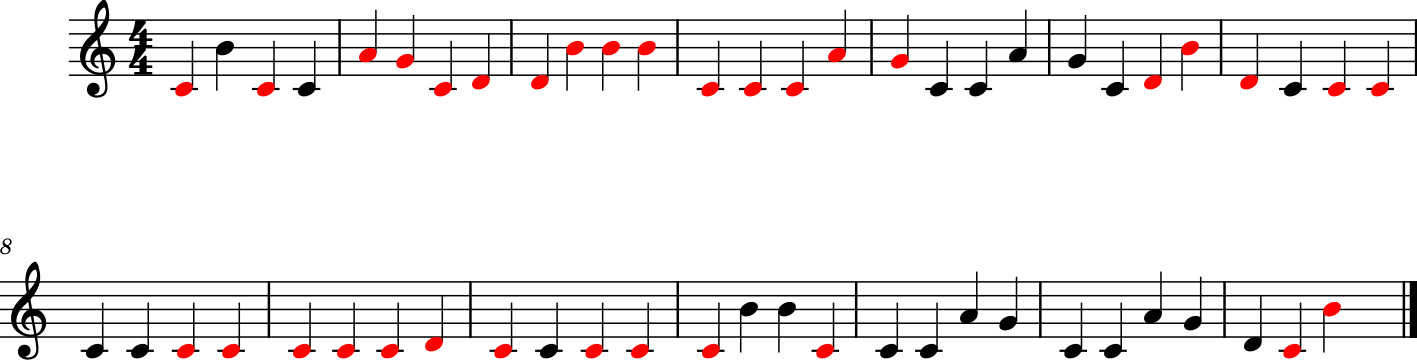

In [140]:
from music21 import *

note_prezise = predictii

note_corecte = ['B3','B3','B3','C4','C4','A3','G3','C4','C4','A3','G3','C4','D4','D4','B3','B3','B3','C4','C4','A3',
                      'G3','C4','C4','A3','G3','C4','D4','D4','C4','C4','A4','A4','G4','G4','E4','E4','D4','C4','E4','G4',
                      'E4','B3','B3','B3','C4','C4','A3','G3','C4','C4','A3','G3','D4','B3','C4']


s = stream.Stream()
for i, j in zip(note_prezise, note_corecte):
        if i[0] != j[0]:
            n = note.Note(i[0], quarterLength = 1)
            n.style.color='red'
            s.append([n])
        else:
            n = note.Note(i[0], quarterLength = 1)
            s.append([n])
    
s.show()

In [141]:
# old

In [142]:
# old

In [143]:
# # Antrenare
# folder = 'spectograme_train_filtrate_prag11db'
# path_folder = os.path.join(os.getcwd(), folder)
# fisiere = os.listdir(path_folder)
# path_fisiere = [os.path.join(path_folder, i) for i in fisiere]

# imagini = [cv2.imread(i) for i in path_fisiere]
# imagini = np.array(imagini)
# dim = len(imagini[0]) * len(imagini[0][0]) * 3
# imagini = imagini.reshape((imagini.shape[0]), dim)

# clase = [i[:3] if i[2]=='#' else i[:2] for i in fisiere]
# # le = LabelEncoder()
# # clase = le.fit_transform(clase)

# X_train = imagini
# y_train = clase
# model = KNeighborsClassifier()
# model.fit(X_train, y_train)

In [144]:
# Testare

In [145]:
# # Onset-uri

# folder = 'spectograme_onseturi'
# path_folder = os.path.join(os.getcwd(), folder)
# fisiere = os.listdir(path_folder)
# path_fisiere = [os.path.join(path_folder, i) for i in fisiere]

# imagini = [cv2.imread(i) for i in path_fisiere]
# imagini = np.array(imagini)
# dim = len(imagini[0]) * len(imagini[0][0]) * 3
# imagini = imagini.reshape((imagini.shape[0]), dim)

# X_test = imagini
# predictii = model.predict(X_test)

In [146]:
# predictii